In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline

Pour réaliser les exercices de ce noteboook, il sera utile de regarder les liens des ressources et la documentation de sklearn et de pandas.

# Import data and get into column format

In [2]:
# read the following file 'ESP_PUBLIC.IDENTITE_ARBRE.csv' from the website in Resources C
# and store the content in a dataframe variable named df
df=pd.read_csv("ESP_PUBLIC.IDENTITE_ARBRE.csv")
df.shape

(31953, 32)

In [3]:
# display the first 5 lines of the file
df.head()

,ELEM_POINT_ID,CODE,NOM,GENRE,GENRE_DESC,CATEGORIE,CATEGORIE_DESC,SOUS_CATEGORIE,SOUS_CATEGORIE_DESC,CODE_PARENT,...,COURRIER,IDENTIFIANTPLU,TYPEIMPLANTATIONPLU,INTITULEPROTECTIONPLU,ANNEEABATTAGE,ESSOUCHEMENT,DIAMETREARBRE,CAUSEABATTAGE,COLLECTIVITE,GeoJSON
0,32215,ESP32919,ESP32919,VEG,VEGETATION,ESP01,Arbre,ESP151,Arbre de voirie,ESP32840,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Grenoble Alpes Métropole,"{""type"":""Point"",""coordinates"":[5.7199186831633..."
1,32214,ESP32918,ESP32918,VEG,VEGETATION,ESP01,Arbre,ESP151,Arbre de voirie,ESP32840,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Grenoble Alpes Métropole,"{""type"":""Point"",""coordinates"":[5.7199940483740..."
2,32213,ESP32917,ESP32917,VEG,VEGETATION,ESP01,Arbre,ESP151,Arbre de voirie,ESP32840,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Grenoble Alpes Métropole,"{""type"":""Point"",""coordinates"":[5.7200063674702..."
3,32212,ESP32916,ESP32916,VEG,VEGETATION,ESP01,Arbre,ESP151,Arbre de voirie,ESP32840,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Grenoble Alpes Métropole,"{""type"":""Point"",""coordinates"":[5.7199594073925..."
4,32211,ESP32915,ESP32915,VEG,VEGETATION,ESP01,Arbre,ESP151,Arbre de voirie,ESP32840,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Grenoble Alpes Métropole,"{""type"":""Point"",""coordinates"":[5.720047467919,..."


In [4]:
# explain what the following line does in a markdown cell below: 
# what is the input, what is the output, which is the type of the output
df.GeoJSON[0]

'{"type":"Point","coordinates":[5.71991868316333,45.1902373901707]}'

**explanations here**

It's showing the first row of the Sequence (first element)
which is a str

In [5]:
import json
#x = json.loads('{"foo" : "bar", "hello" : "world"}')
print(df.GeoJSON[2],json.loads(df.GeoJSON[2]),df.GeoJSON[2])

{"type":"Point","coordinates":[5.72000636747023,45.1903222955413]} {'type': 'Point', 'coordinates': [5.72000636747023, 45.1903222955413]} {"type":"Point","coordinates":[5.72000636747023,45.1903222955413]}


In [6]:
# change the json string to a python dictionary on each of the values in the GeoJSON Column using "apply"


A=pd.DataFrame(df.GeoJSON)
A=A.apply(lambda x:json.loads(x[0]),axis=1 )      
df.GeoJSON=A
A



0        {'type': 'Point', 'coordinates': [5.7199186831...
1        {'type': 'Point', 'coordinates': [5.7199940483...
2        {'type': 'Point', 'coordinates': [5.7200063674...
3        {'type': 'Point', 'coordinates': [5.7199594073...
4        {'type': 'Point', 'coordinates': [5.7200474679...
                               ...                        
31948    {'type': 'Point', 'coordinates': [5.7117236533...
31949    {'type': 'Point', 'coordinates': [5.7119827720...
31950    {'type': 'Point', 'coordinates': [5.7116286455...
31951    {'type': 'Point', 'coordinates': [5.7119395933...
31952    {'type': 'Point', 'coordinates': [5.7117201813...
Length: 31953, dtype: object

In [7]:
# display the coordinates of the first element in the GeoJSON column
print(type(df.iloc[0,-1]),df.iloc[0,-1]["coordinates"])

<class 'dict'> [5.71991868316333, 45.1902373901707]


In [8]:
# import pandas as pd
# use  pandas.io.json.json_normalize  to normalize the json coordinates into a new variable "coord"
coord=pd.io.json.json_normalize(df.GeoJSON)["coordinates"]
coord

0        [5.71991868316333, 45.1902373901707]
1        [5.71999404837408, 45.1902804861137]
2        [5.72000636747023, 45.1903222955413]
3        [5.71995940739258, 45.1903592495204]
4          [5.720047467919, 45.1904417102787]
                         ...                 
31948    [5.71172365334341, 45.1649497242899]
31949    [5.71198277200449, 45.1648222221272]
31950    [5.71162864556154, 45.1649668978421]
31951    [5.71193959338567, 45.1649180978557]
31952     [5.7117201813578, 45.1648672120428]
Name: coordinates, Length: 31953, dtype: object

In [9]:
# store the longitude and latitude in two variables starting from the values in the "coord" variable using "apply"

longitude = None
latitude = None
#coord.apply(lambda x:{"longitude":x[0],"latitude":x[1]})
a=coord.apply(lambda x:{"longitude":x[0],"latitude":x[1]})
longitude=coord.apply(lambda x:x[1])
latitude=coord.apply(lambda x:x[0])
a

0        {'longitude': 5.71991868316333, 'latitude': 45...
1        {'longitude': 5.71999404837408, 'latitude': 45...
2        {'longitude': 5.72000636747023, 'latitude': 45...
3        {'longitude': 5.71995940739258, 'latitude': 45...
4        {'longitude': 5.720047467919, 'latitude': 45.1...
                               ...                        
31948    {'longitude': 5.71172365334341, 'latitude': 45...
31949    {'longitude': 5.71198277200449, 'latitude': 45...
31950    {'longitude': 5.71162864556154, 'latitude': 45...
31951    {'longitude': 5.71193959338567, 'latitude': 45...
31952    {'longitude': 5.7117201813578, 'latitude': 45....
Name: coordinates, Length: 31953, dtype: object

In [10]:
# remove the GeoJSON column from the dataframe df without copying it.
del(df["GeoJSON"])

In [11]:
# define two new cols for the LONGITUDE and LATITUDE 
# and assign them the values contained in the variables longitude and latitude 
df.loc[:,"LONGITUDE"]=longitude
df.loc[:,"LATITUDE"]=latitude
df

,ELEM_POINT_ID,CODE,NOM,GENRE,GENRE_DESC,CATEGORIE,CATEGORIE_DESC,SOUS_CATEGORIE,SOUS_CATEGORIE_DESC,CODE_PARENT,...,IDENTIFIANTPLU,TYPEIMPLANTATIONPLU,INTITULEPROTECTIONPLU,ANNEEABATTAGE,ESSOUCHEMENT,DIAMETREARBRE,CAUSEABATTAGE,COLLECTIVITE,LONGITUDE,LATITUDE
0,32215,ESP32919,ESP32919,VEG,VEGETATION,ESP01,Arbre,ESP151,Arbre de voirie,ESP32840,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Grenoble Alpes Métropole,45.190237,5.719919
1,32214,ESP32918,ESP32918,VEG,VEGETATION,ESP01,Arbre,ESP151,Arbre de voirie,ESP32840,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Grenoble Alpes Métropole,45.190280,5.719994
2,32213,ESP32917,ESP32917,VEG,VEGETATION,ESP01,Arbre,ESP151,Arbre de voirie,ESP32840,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Grenoble Alpes Métropole,45.190322,5.720006
3,32212,ESP32916,ESP32916,VEG,VEGETATION,ESP01,Arbre,ESP151,Arbre de voirie,ESP32840,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Grenoble Alpes Métropole,45.190359,5.719959
4,32211,ESP32915,ESP32915,VEG,VEGETATION,ESP01,Arbre,ESP151,Arbre de voirie,ESP32840,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Grenoble Alpes Métropole,45.190442,5.720047
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31948,23339,ESP28693,ESP28693,VEG,VEGETATION,ESP01,Arbre,ESP151,Arbre de voirie,ESP1221,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Grenoble Alpes Métropole,45.164950,5.711724
31949,919,ESP26621,ESP26621,VEG,VEGETATION,ESP01,Arbre,ESP151,Arbre de voirie,ESP1221,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Grenoble Alpes Métropole,45.164822,5.711983
31950,19628,ESP24819,ESP24819,VEG,VEGETATION,ESP01,Arbre,ESP151,Arbre de voirie,ESP1221,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Grenoble Alpes Métropole,45.164967,5.711629
31951,15999,ESP23135,ESP23135,VEG,VEGETATION,ESP01,Arbre,ESP151,Arbre de voirie,ESP1221,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Grenoble Alpes Métropole,45.164918,5.711940


# Investigate data 

Run and explain the result of the following python cell in the space below


In [12]:
df.head()

,ELEM_POINT_ID,CODE,NOM,GENRE,GENRE_DESC,CATEGORIE,CATEGORIE_DESC,SOUS_CATEGORIE,SOUS_CATEGORIE_DESC,CODE_PARENT,...,IDENTIFIANTPLU,TYPEIMPLANTATIONPLU,INTITULEPROTECTIONPLU,ANNEEABATTAGE,ESSOUCHEMENT,DIAMETREARBRE,CAUSEABATTAGE,COLLECTIVITE,LONGITUDE,LATITUDE
0,32215,ESP32919,ESP32919,VEG,VEGETATION,ESP01,Arbre,ESP151,Arbre de voirie,ESP32840,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Grenoble Alpes Métropole,45.190237,5.719919
1,32214,ESP32918,ESP32918,VEG,VEGETATION,ESP01,Arbre,ESP151,Arbre de voirie,ESP32840,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Grenoble Alpes Métropole,45.190280,5.719994
2,32213,ESP32917,ESP32917,VEG,VEGETATION,ESP01,Arbre,ESP151,Arbre de voirie,ESP32840,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Grenoble Alpes Métropole,45.190322,5.720006
3,32212,ESP32916,ESP32916,VEG,VEGETATION,ESP01,Arbre,ESP151,Arbre de voirie,ESP32840,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Grenoble Alpes Métropole,45.190359,5.719959
4,32211,ESP32915,ESP32915,VEG,VEGETATION,ESP01,Arbre,ESP151,Arbre de voirie,ESP32840,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Grenoble Alpes Métropole,45.190442,5.720047


*here*
It's strange, a question above asked me to show 5 firsts elements.

Run and explain the result of the following python cell in the space below


In [13]:
df.shape

(31953, 33)

*here*
size of matrix

In [14]:
df.isnull().sum()

ELEM_POINT_ID                0
CODE                         0
NOM                          0
GENRE                        0
GENRE_DESC                   0
CATEGORIE                    0
CATEGORIE_DESC               0
SOUS_CATEGORIE               0
SOUS_CATEGORIE_DESC          0
CODE_PARENT                  0
CODE_PARENT_DESC             0
ADR_SECTEUR                  0
BIEN_REFERENCE               0
GENRE_BOTA                 229
ESPECE                    2024
VARIETE                  27738
STADEDEDEVELOPPEMENT      2175
EQUIPE                   31953
REMARQUES                30427
ANNEEDEPLANTATION          553
RAISONDEPLANTATION       29204
TRAITEMENTCHENILLES      29663
COURRIER                 31953
IDENTIFIANTPLU           31347
TYPEIMPLANTATIONPLU      31347
INTITULEPROTECTIONPLU    31347
ANNEEABATTAGE            31953
ESSOUCHEMENT             31953
DIAMETREARBRE            31953
CAUSEABATTAGE            31953
COLLECTIVITE               185
LONGITUDE                    0
LATITUDE

Run and explain the results of the following python cells in the space below


In [15]:
df.isnull().sum()
df.isnull().sum(axis=1)

0        12
1        13
2        12
3        12
4        13
         ..
31948    13
31949    13
31950    13
31951    13
31952    13
Length: 31953, dtype: int64

*here* it adds up each occurence of null values. It proceed as a conditional count
first is on columns, second on rows

Run and explain the results of the following python cell in the space below


In [16]:
df.count()

ELEM_POINT_ID            31953
CODE                     31953
NOM                      31953
GENRE                    31953
GENRE_DESC               31953
CATEGORIE                31953
CATEGORIE_DESC           31953
SOUS_CATEGORIE           31953
SOUS_CATEGORIE_DESC      31953
CODE_PARENT              31953
CODE_PARENT_DESC         31953
ADR_SECTEUR              31953
BIEN_REFERENCE           31953
GENRE_BOTA               31724
ESPECE                   29929
VARIETE                   4215
STADEDEDEVELOPPEMENT     29778
EQUIPE                       0
REMARQUES                 1526
ANNEEDEPLANTATION        31400
RAISONDEPLANTATION        2749
TRAITEMENTCHENILLES       2290
COURRIER                     0
IDENTIFIANTPLU             606
TYPEIMPLANTATIONPLU        606
INTITULEPROTECTIONPLU      606
ANNEEABATTAGE                0
ESSOUCHEMENT                 0
DIAMETREARBRE                0
CAUSEABATTAGE                0
COLLECTIVITE             31768
LONGITUDE                31953
LATITUDE

In [17]:
df.isnull().sum()+df.count()==[31953 for i in range(len(df.columns))]

ELEM_POINT_ID            True
CODE                     True
NOM                      True
GENRE                    True
GENRE_DESC               True
CATEGORIE                True
CATEGORIE_DESC           True
SOUS_CATEGORIE           True
SOUS_CATEGORIE_DESC      True
CODE_PARENT              True
CODE_PARENT_DESC         True
ADR_SECTEUR              True
BIEN_REFERENCE           True
GENRE_BOTA               True
ESPECE                   True
VARIETE                  True
STADEDEDEVELOPPEMENT     True
EQUIPE                   True
REMARQUES                True
ANNEEDEPLANTATION        True
RAISONDEPLANTATION       True
TRAITEMENTCHENILLES      True
COURRIER                 True
IDENTIFIANTPLU           True
TYPEIMPLANTATIONPLU      True
INTITULEPROTECTIONPLU    True
ANNEEABATTAGE            True
ESSOUCHEMENT             True
DIAMETREARBRE            True
CAUSEABATTAGE            True
COLLECTIVITE             True
LONGITUDE                True
LATITUDE                 True
dtype: boo

*here* It count not null values, see above

Run and explain the result of the following python cell in the space below


In [18]:
df.dtypes

ELEM_POINT_ID              int64
CODE                      object
NOM                       object
GENRE                     object
GENRE_DESC                object
CATEGORIE                 object
CATEGORIE_DESC            object
SOUS_CATEGORIE            object
SOUS_CATEGORIE_DESC       object
CODE_PARENT               object
CODE_PARENT_DESC          object
ADR_SECTEUR                int64
BIEN_REFERENCE            object
GENRE_BOTA                object
ESPECE                    object
VARIETE                   object
STADEDEDEVELOPPEMENT      object
EQUIPE                   float64
REMARQUES                 object
ANNEEDEPLANTATION        float64
RAISONDEPLANTATION        object
TRAITEMENTCHENILLES       object
COURRIER                 float64
IDENTIFIANTPLU           float64
TYPEIMPLANTATIONPLU       object
INTITULEPROTECTIONPLU     object
ANNEEABATTAGE            float64
ESSOUCHEMENT             float64
DIAMETREARBRE            float64
CAUSEABATTAGE            float64
COLLECTIVI

*here* it shows types

Run and explain the result of the following python cell in the space below


In [19]:
df.COLLECTIVITE.value_counts()

Ville de Grenoble           16222
Grenoble Alpes Métropole    15546
Name: COLLECTIVITE, dtype: int64

*here* it counts the number of occurences of each values

## Quick plots

Use seaborn scatter to plot the data using *LONGITUDE* and *LATITUDE* as `x` and `y` axis and three features of your choice as `hue` parameter.

In [20]:
#we need to see how many different category their is for each columns in order to group them on 
#the graph

df.nunique()

ELEM_POINT_ID            31953
CODE                     31953
NOM                      31953
GENRE                        1
GENRE_DESC                   1
CATEGORIE                    1
CATEGORIE_DESC               1
SOUS_CATEGORIE               4
SOUS_CATEGORIE_DESC          4
CODE_PARENT               1458
CODE_PARENT_DESC          1458
ADR_SECTEUR                  6
BIEN_REFERENCE           31953
GENRE_BOTA                 119
ESPECE                     275
VARIETE                    183
STADEDEDEVELOPPEMENT         3
EQUIPE                       0
REMARQUES                   10
ANNEEDEPLANTATION           62
RAISONDEPLANTATION           3
TRAITEMENTCHENILLES          3
COURRIER                     0
IDENTIFIANTPLU              46
TYPEIMPLANTATIONPLU          4
INTITULEPROTECTIONPLU        3
ANNEEABATTAGE                0
ESSOUCHEMENT                 0
DIAMETREARBRE                0
CAUSEABATTAGE                0
COLLECTIVITE                 2
LONGITUDE                31952
LATITUDE

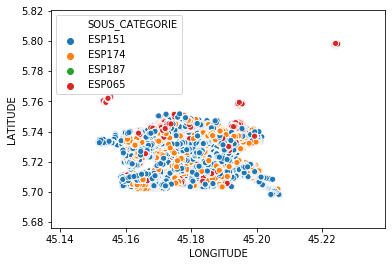

In [21]:
# code for plotting the first feature here
sns.scatterplot(df.LONGITUDE,df.LATITUDE,hue=df.SOUS_CATEGORIE )

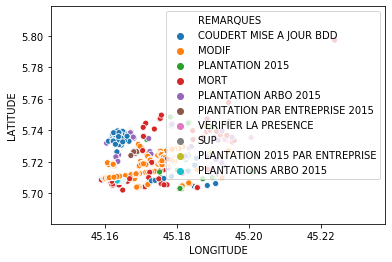

In [22]:
# code for plotting the second feature here
sns.scatterplot(df.LONGITUDE,df.LATITUDE,hue=df.REMARQUES)
# need to use matplotlib in order to 
# handle the legend


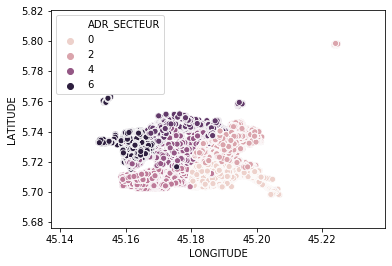

In [23]:
# code for plotting the third feature here
sns.scatterplot(df.LONGITUDE,df.LATITUDE,hue=df.ADR_SECTEUR )

# Remove non- useful columns

Display the total number of lines in the dataframe

In [24]:
# code here
df.shape[0]
df.count()==df.shape[0]

ELEM_POINT_ID             True
CODE                      True
NOM                       True
GENRE                     True
GENRE_DESC                True
CATEGORIE                 True
CATEGORIE_DESC            True
SOUS_CATEGORIE            True
SOUS_CATEGORIE_DESC       True
CODE_PARENT               True
CODE_PARENT_DESC          True
ADR_SECTEUR               True
BIEN_REFERENCE            True
GENRE_BOTA               False
ESPECE                   False
VARIETE                  False
STADEDEDEVELOPPEMENT     False
EQUIPE                   False
REMARQUES                False
ANNEEDEPLANTATION        False
RAISONDEPLANTATION       False
TRAITEMENTCHENILLES      False
COURRIER                 False
IDENTIFIANTPLU           False
TYPEIMPLANTATIONPLU      False
INTITULEPROTECTIONPLU    False
ANNEEABATTAGE            False
ESSOUCHEMENT             False
DIAMETREARBRE            False
CAUSEABATTAGE            False
COLLECTIVITE             False
LONGITUDE                 True
LATITUDE

Display the columns names for columns with all missing values

*(please do it in one line...)*

In [25]:
# the line of code here
df.count().loc[df.count()!=df.shape[0]].index

Index(['GENRE_BOTA', 'ESPECE', 'VARIETE', 'STADEDEDEVELOPPEMENT', 'EQUIPE',
       'REMARQUES', 'ANNEEDEPLANTATION', 'RAISONDEPLANTATION',
       'TRAITEMENTCHENILLES', 'COURRIER', 'IDENTIFIANTPLU',
       'TYPEIMPLANTATIONPLU', 'INTITULEPROTECTIONPLU', 'ANNEEABATTAGE',
       'ESSOUCHEMENT', 'DIAMETREARBRE', 'CAUSEABATTAGE', 'COLLECTIVITE'],
      dtype='object')

Display the columns names for columns where there are no missing values

*(please do it in one line...)*

In [46]:
# the line of code here
df.count()[df.count()==df.shape[0]].index

Index(['ELEM_POINT_ID', 'CODE', 'NOM', 'GENRE', 'GENRE_DESC', 'CATEGORIE',
       'CATEGORIE_DESC', 'SOUS_CATEGORIE', 'SOUS_CATEGORIE_DESC',
       'CODE_PARENT', 'CODE_PARENT_DESC', 'ADR_SECTEUR', 'BIEN_REFERENCE',
       'LONGITUDE', 'LATITUDE'],
      dtype='object')

How many distinct values are there for the column GENRE_BOTA?

*(please do it in one line...)*

In [27]:
# code here
df.GENRE_BOTA.nunique()

119

Where are the missing values?

['GENRE_BOTA', 'ESPECE', 'VARIETE', 'STADEDEDEVELOPPEMENT', 'EQUIPE',
       'REMARQUES', 'ANNEEDEPLANTATION', 'RAISONDEPLANTATION',
       'TRAITEMENTCHENILLES', 'COURRIER', 'IDENTIFIANTPLU',
       'TYPEIMPLANTATIONPLU', 'INTITULEPROTECTIONPLU', 'ANNEEABATTAGE',
       'ESSOUCHEMENT', 'DIAMETREARBRE', 'CAUSEABATTAGE', 'COLLECTIVITE']

Use the seaborn heatmap plot for displaying all missing values

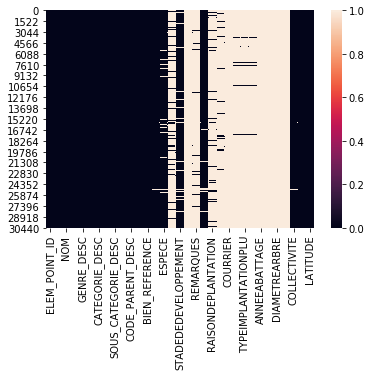

In [28]:
# code here
data=df.isnull()
sns.heatmap(data)

In [29]:
import missingno as msno

Use the `matrix` and `heatmap` functions of the `missingno` library for displaying a heatmap, a missing values matrix and a dendrogram.

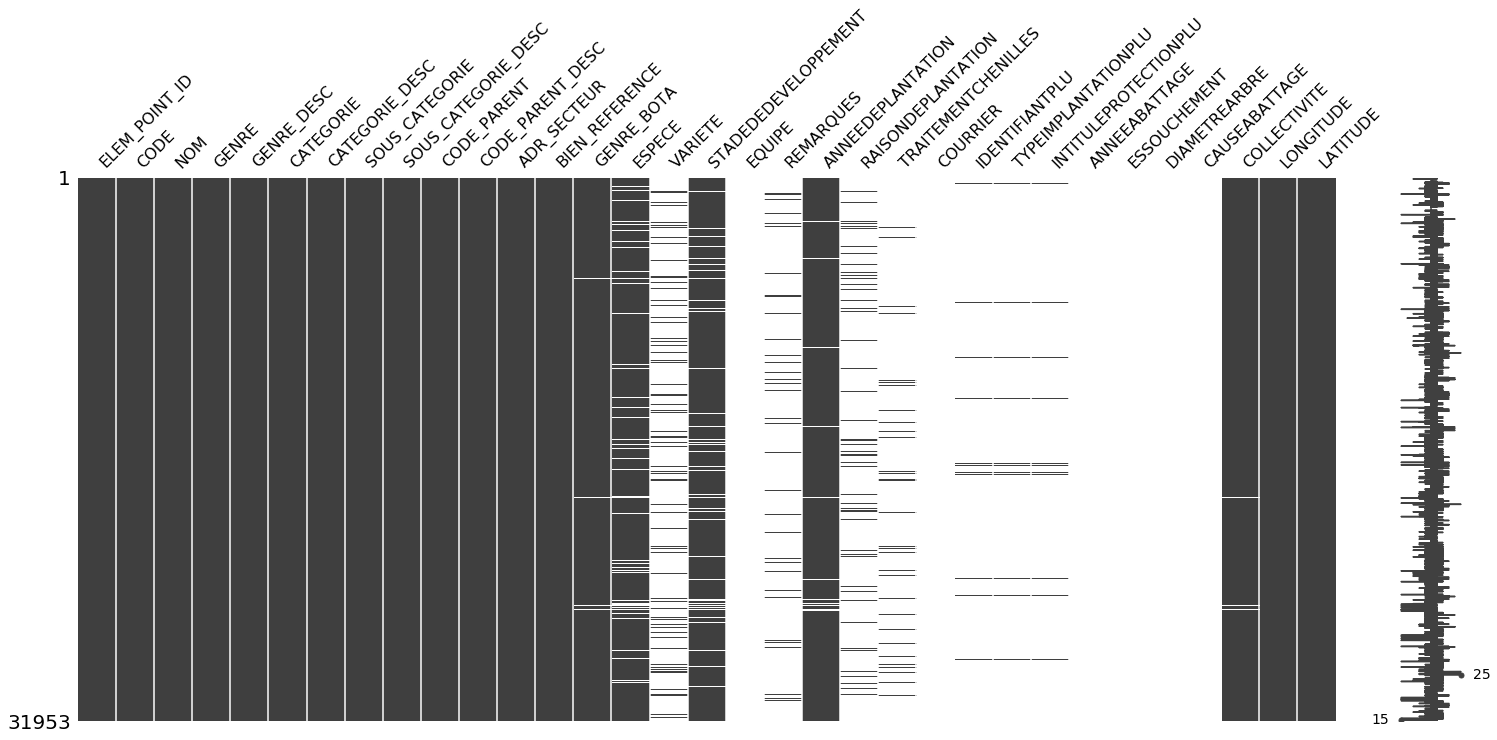

In [30]:
# code for displaying the matrix
msno.matrix(df)

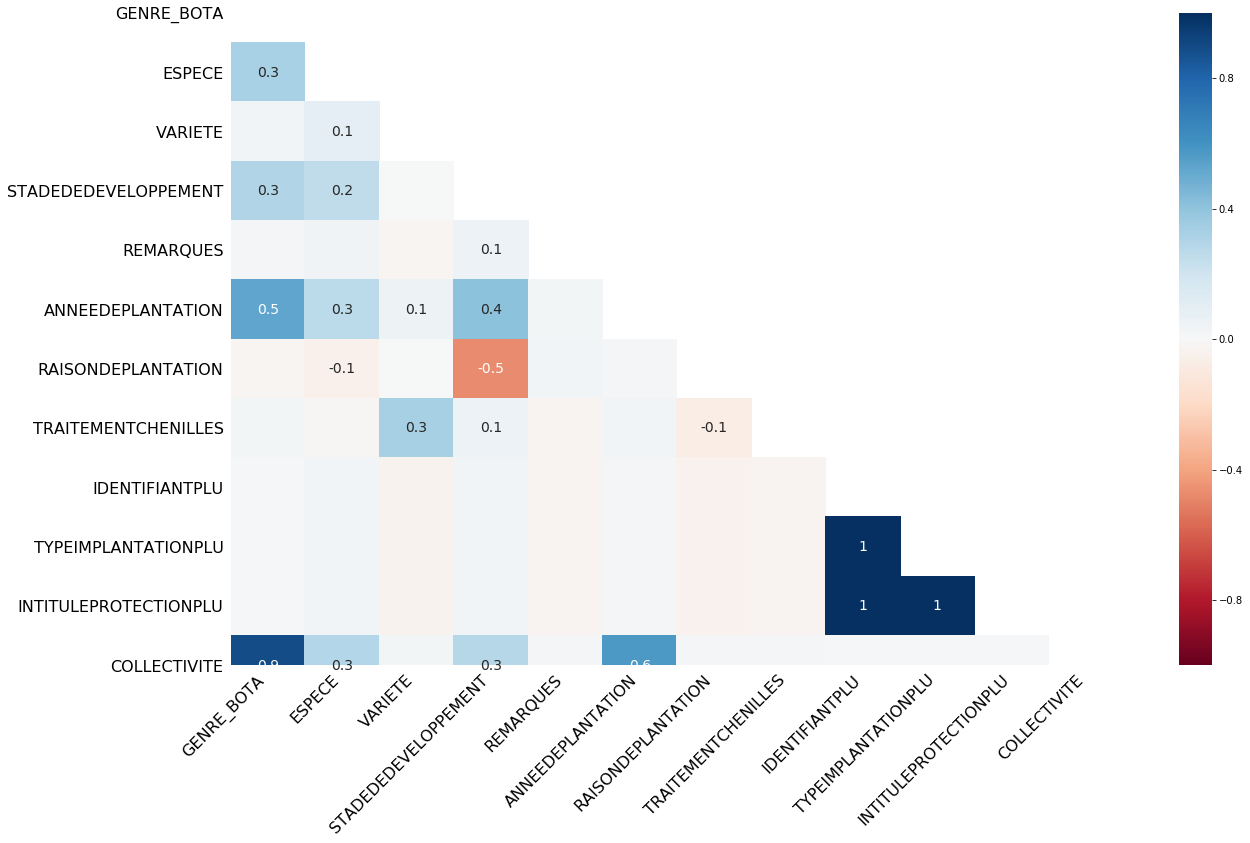

In [31]:
# code for displaying the heatmap
msno.heatmap(df)

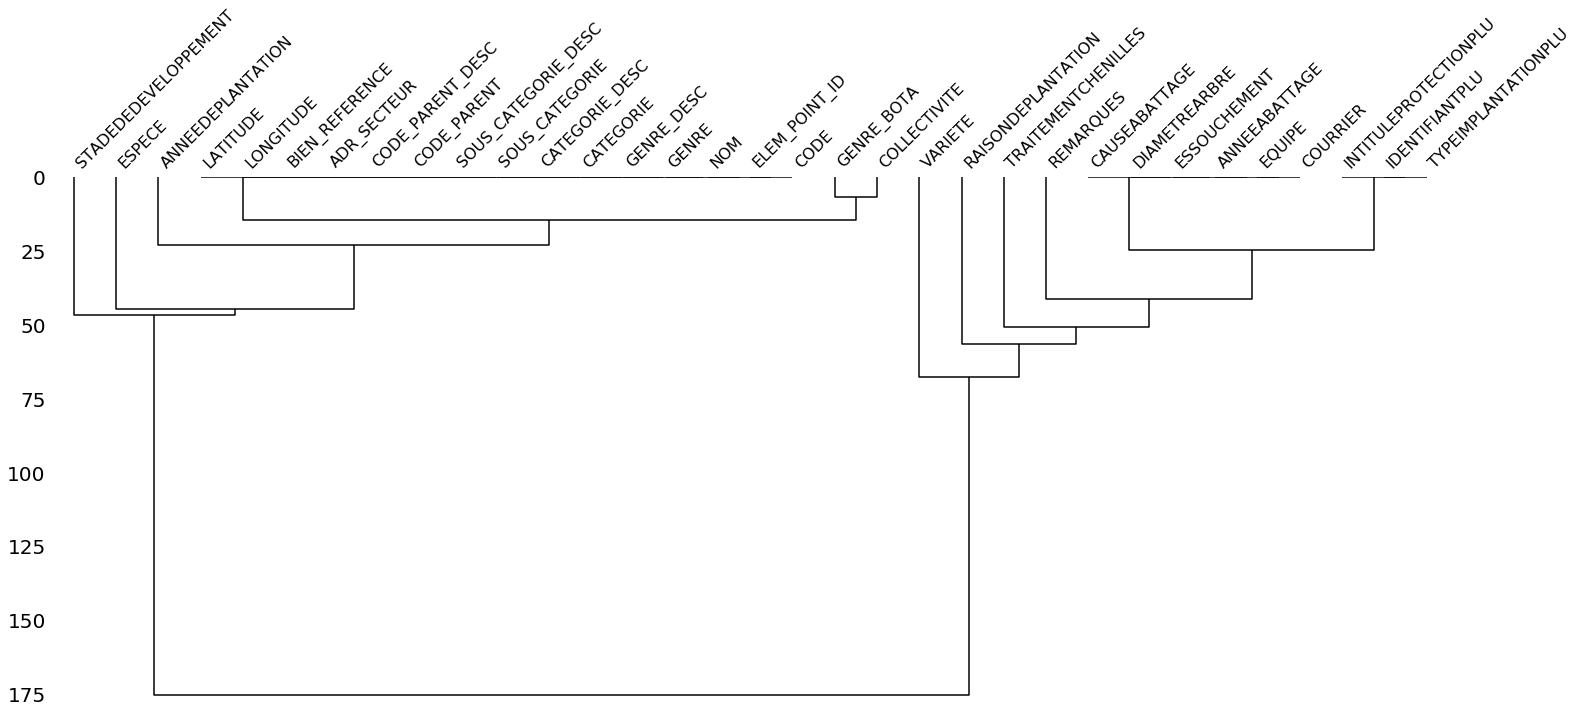

In [32]:
# code for displaying the dendrogram
msno.dendrogram(df)

Remove missing dates (in the column `ANNEDEPLANTATION`) and store the remaining dataframe in a variable named `clean`

In [33]:
# code here
clean=df.loc[df.ANNEEDEPLANTATION.isnull()!=True]
#clean.head()
clean.head()

,ELEM_POINT_ID,CODE,NOM,GENRE,GENRE_DESC,CATEGORIE,CATEGORIE_DESC,SOUS_CATEGORIE,SOUS_CATEGORIE_DESC,CODE_PARENT,...,IDENTIFIANTPLU,TYPEIMPLANTATIONPLU,INTITULEPROTECTIONPLU,ANNEEABATTAGE,ESSOUCHEMENT,DIAMETREARBRE,CAUSEABATTAGE,COLLECTIVITE,LONGITUDE,LATITUDE
0,32215,ESP32919,ESP32919,VEG,VEGETATION,ESP01,Arbre,ESP151,Arbre de voirie,ESP32840,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Grenoble Alpes Métropole,45.190237,5.719919
1,32214,ESP32918,ESP32918,VEG,VEGETATION,ESP01,Arbre,ESP151,Arbre de voirie,ESP32840,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Grenoble Alpes Métropole,45.190280,5.719994
2,32213,ESP32917,ESP32917,VEG,VEGETATION,ESP01,Arbre,ESP151,Arbre de voirie,ESP32840,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Grenoble Alpes Métropole,45.190322,5.720006
3,32212,ESP32916,ESP32916,VEG,VEGETATION,ESP01,Arbre,ESP151,Arbre de voirie,ESP32840,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Grenoble Alpes Métropole,45.190359,5.719959
4,32211,ESP32915,ESP32915,VEG,VEGETATION,ESP01,Arbre,ESP151,Arbre de voirie,ESP32840,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Grenoble Alpes Métropole,45.190442,5.720047


Inspect the shape of the cleaned dataframe

In [34]:
# code here
clean.shape

(31400, 33)

Remove empty columns (+ columns that are close to empty) 

A 'close to empty' column is a column with a total number of elements lower or equal to 28000.

Store the columns' names in a variable named `cols_list_clean`

In [35]:
# code here
A=clean.dropna(thresh=28000,axis=1)
A

,ELEM_POINT_ID,CODE,NOM,GENRE,GENRE_DESC,CATEGORIE,CATEGORIE_DESC,SOUS_CATEGORIE,SOUS_CATEGORIE_DESC,CODE_PARENT,CODE_PARENT_DESC,ADR_SECTEUR,BIEN_REFERENCE,GENRE_BOTA,ESPECE,STADEDEDEVELOPPEMENT,ANNEEDEPLANTATION,COLLECTIVITE,LONGITUDE,LATITUDE
0,32215,ESP32919,ESP32919,VEG,VEGETATION,ESP01,Arbre,ESP151,Arbre de voirie,ESP32840,Crs Jaurès impair de PHD/ Lorr,2,AR32919,Platanus,platanor,Arbre jeune,2014.0,Grenoble Alpes Métropole,45.190237,5.719919
1,32214,ESP32918,ESP32918,VEG,VEGETATION,ESP01,Arbre,ESP151,Arbre de voirie,ESP32840,Crs Jaurès impair de PHD/ Lorr,2,AR32918,Tilia,mongolica,Arbre jeune,2014.0,Grenoble Alpes Métropole,45.190280,5.719994
2,32213,ESP32917,ESP32917,VEG,VEGETATION,ESP01,Arbre,ESP151,Arbre de voirie,ESP32840,Crs Jaurès impair de PHD/ Lorr,2,AR32917,Malus,perpetu,Arbre jeune,2014.0,Grenoble Alpes Métropole,45.190322,5.720006
3,32212,ESP32916,ESP32916,VEG,VEGETATION,ESP01,Arbre,ESP151,Arbre de voirie,ESP32840,Crs Jaurès impair de PHD/ Lorr,2,AR32916,Platanus,platanor,Arbre jeune,2014.0,Grenoble Alpes Métropole,45.190359,5.719959
4,32211,ESP32915,ESP32915,VEG,VEGETATION,ESP01,Arbre,ESP151,Arbre de voirie,ESP32840,Crs Jaurès impair de PHD/ Lorr,2,AR32915,Tilia,mongolica,Arbre jeune,2014.0,Grenoble Alpes Métropole,45.190442,5.720047
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31948,23339,ESP28693,ESP28693,VEG,VEGETATION,ESP01,Arbre,ESP151,Arbre de voirie,ESP1221,Ave du 11 Novembre,3,AR28693,Tilia,tomentosa,Arbre jeune,1991.0,Grenoble Alpes Métropole,45.164950,5.711724
31949,919,ESP26621,ESP26621,VEG,VEGETATION,ESP01,Arbre,ESP151,Arbre de voirie,ESP1221,Ave du 11 Novembre,3,AR26621,Tilia,tomentosa,Arbre adulte,1991.0,Grenoble Alpes Métropole,45.164822,5.711983
31950,19628,ESP24819,ESP24819,VEG,VEGETATION,ESP01,Arbre,ESP151,Arbre de voirie,ESP1221,Ave du 11 Novembre,3,AR24819,Tilia,tomentosa,Arbre adulte,1991.0,Grenoble Alpes Métropole,45.164967,5.711629
31951,15999,ESP23135,ESP23135,VEG,VEGETATION,ESP01,Arbre,ESP151,Arbre de voirie,ESP1221,Ave du 11 Novembre,3,AR23135,Tilia,tomentosa,Arbre adulte,1991.0,Grenoble Alpes Métropole,45.164918,5.711940


In [36]:
cols_list_clean=A.columns
cols_list_clean

Index(['ELEM_POINT_ID', 'CODE', 'NOM', 'GENRE', 'GENRE_DESC', 'CATEGORIE',
       'CATEGORIE_DESC', 'SOUS_CATEGORIE', 'SOUS_CATEGORIE_DESC',
       'CODE_PARENT', 'CODE_PARENT_DESC', 'ADR_SECTEUR', 'BIEN_REFERENCE',
       'GENRE_BOTA', 'ESPECE', 'STADEDEDEVELOPPEMENT', 'ANNEEDEPLANTATION',
       'COLLECTIVITE', 'LONGITUDE', 'LATITUDE'],
      dtype='object')

Replace the `clean` data frame by the subset containing only the cleaned columns, then inspect the first five elements of the dataframe.

In [37]:
# code here
clean=A
clean.head()

,ELEM_POINT_ID,CODE,NOM,GENRE,GENRE_DESC,CATEGORIE,CATEGORIE_DESC,SOUS_CATEGORIE,SOUS_CATEGORIE_DESC,CODE_PARENT,CODE_PARENT_DESC,ADR_SECTEUR,BIEN_REFERENCE,GENRE_BOTA,ESPECE,STADEDEDEVELOPPEMENT,ANNEEDEPLANTATION,COLLECTIVITE,LONGITUDE,LATITUDE
0,32215,ESP32919,ESP32919,VEG,VEGETATION,ESP01,Arbre,ESP151,Arbre de voirie,ESP32840,Crs Jaurès impair de PHD/ Lorr,2,AR32919,Platanus,platanor,Arbre jeune,2014.0,Grenoble Alpes Métropole,45.190237,5.719919
1,32214,ESP32918,ESP32918,VEG,VEGETATION,ESP01,Arbre,ESP151,Arbre de voirie,ESP32840,Crs Jaurès impair de PHD/ Lorr,2,AR32918,Tilia,mongolica,Arbre jeune,2014.0,Grenoble Alpes Métropole,45.190280,5.719994
2,32213,ESP32917,ESP32917,VEG,VEGETATION,ESP01,Arbre,ESP151,Arbre de voirie,ESP32840,Crs Jaurès impair de PHD/ Lorr,2,AR32917,Malus,perpetu,Arbre jeune,2014.0,Grenoble Alpes Métropole,45.190322,5.720006
3,32212,ESP32916,ESP32916,VEG,VEGETATION,ESP01,Arbre,ESP151,Arbre de voirie,ESP32840,Crs Jaurès impair de PHD/ Lorr,2,AR32916,Platanus,platanor,Arbre jeune,2014.0,Grenoble Alpes Métropole,45.190359,5.719959
4,32211,ESP32915,ESP32915,VEG,VEGETATION,ESP01,Arbre,ESP151,Arbre de voirie,ESP32840,Crs Jaurès impair de PHD/ Lorr,2,AR32915,Tilia,mongolica,Arbre jeune,2014.0,Grenoble Alpes Métropole,45.190442,5.720047


In [38]:
clean.shape

(31400, 20)

Find the columns that have one single value for all entries.

In [51]:
# code here
clean.columns[clean.nunique()==1]

Index([], dtype='object')

If i understood the question right, there is none of the colummns fullfilling that condition

Remove the following uninteresting columns - i.e ones that have all same values or references

In [40]:
uninteresting_cols = ['NOM','GENRE','GENRE_DESC','CATEGORIE', 'CATEGORIE_DESC', 'BIEN_REFERENCE']

In [41]:
# code here
clean=clean.drop(uninteresting_cols,axis=1)

Find the number of distinct values in the `STADEDEDEVELOPPEMENT` column.

In [42]:
clean.STADEDEDEVELOPPEMENT.nunique()
# code here

3

NOTES

Features looking useful:
* sous_category looks useful (4 categories)
* ADR_SECTEUR (6 categories)
* STADEDEDEVELOPPEMENT (3 categories) 
* COLLECTIVITE (2 categories)


Less useful:
* CODE_PARENT_DESC (too many categories - ~1400, but could be usefull to make new featues (most common tree in local area etc).
* GENRE_BOTA (112 categories) 
* ESPECE(257 categories)
* VARIETE (183 cats but missing vals) 

In [43]:
# if you want you can display the whole clean dataframe here
clean.to_csv('../data/modified/first_clean.csv',index=False)

For storing the dataframe in a csv file, use `clean.to_csv('./data/modified/first_clean.csv',index=False)`

## Save out to pickle file

The file name should be 'trees_first_clean.pkl'

In [44]:
# code here
clean.to_pickle('../data/modified/trees_first_clean.pkl')

pickle file, binary is almost twice less heavy